<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-текста" data-toc-modified-id="Подготовка-текста-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка текста</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Борьба-с-дисбалансом-и-разделение-на-выборки" data-toc-modified-id="Борьба-с-дисбалансом-и-разделение-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Борьба с дисбалансом и разделение на выборки</a></span></li><li><span><a href="#Векторизация-слов-методом-TF-IDF" data-toc-modified-id="Векторизация-слов-методом-TF-IDF-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Векторизация слов методом TF-IDF</a></span></li><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li><li><span><a href="#Модель-RandomForestClassifier" data-toc-modified-id="Модель-RandomForestClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Модель RandomForestClassifier</a></span></li><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span></li></ul></li><li><span><a href="#Вывод-и-проверка-модели-на-тестовой-выборке" data-toc-modified-id="Вывод-и-проверка-модели-на-тестовой-выборке-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод и проверка модели на тестовой выборке</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Анализ данных

In [1]:
# для анализа и работы с данными
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# модели ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     cross_val_score)
# метрики для алгоритмов ML
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")
                       
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import (stopwords,
                         wordnet)

# библиотеки для обработи текста
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import (TfidfVectorizer,
                                             CountVectorizer)
import re

# константы 
RANDOM_STATE = 12345
STOP_WORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv')

Создадим функцию для анализа данных.

In [3]:
# Созадим функцию для анализа таблиц
def analysis(data):
    print(100*'-')
    print('Общая информамия:')
    print(data.info())
    
    print(100*'-')
    print('Первые 5 строк')
    display(data.head(5))
    
    print(100*'-')
    print('Количество пропусков')
    print(data.isnull().sum())
    
    print(100*'-')
    print('Количество дубликатов:')
    display(data.duplicated().sum())
    
    print(100*'-')
    print('Статистические данные')
    display(data.describe())
    
    print(100*'-')
    print('Общиегистограммы')
    data.hist(figsize = (10, 5))

----------------------------------------------------------------------------------------------------
Общая информамия:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB
None
----------------------------------------------------------------------------------------------------
Первые 5 строк


,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


----------------------------------------------------------------------------------------------------
Количество пропусков
Unnamed: 0    0
text          0
toxic         0
dtype: int64
----------------------------------------------------------------------------------------------------
Количество дубликатов:


0

----------------------------------------------------------------------------------------------------
Статистические данные


,Unnamed: 0,toxic
count,159292.000000,159292.000000
mean,79725.697242,0.101612
std,46028.837471,0.302139
min,0.000000,0.000000
25%,39872.750000,0.000000
50%,79721.500000,0.000000
75%,119573.250000,0.000000
max,159450.000000,1.000000


----------------------------------------------------------------------------------------------------
Общиегистограммы


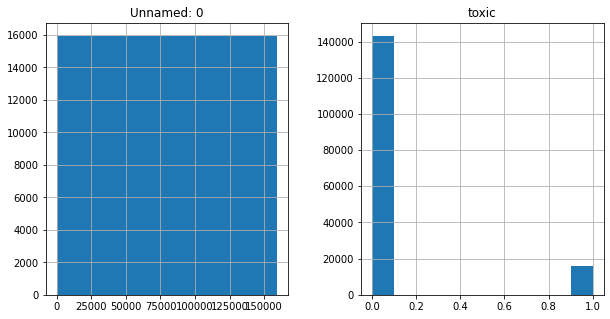

In [4]:
analysis(data)

При анализе данных видно, что у нас имеется 3 столбца и порядка 159000 наблюдений. Пропуски и дубликаты отсутствуют. Для задач машинного обучения можно убрать столбец unnamed, т.к. он не несет важной информации. Также надо обратить внимание на соотношения целевого признака, тут у нас имеется дизбаланс классов по нему также надо будет провести проверку.
Т.к. стоит задача обработки текста, а я ядро на плафторме не может обрабатывать большое количество наблюдений снизим количество исследуемых наблюдений до 50000 . Хоть и большое количество наблюдений хорошо влияет на итоговую точность модели, но для задач данного кейса этого набора данных вполне должно хватить.

In [5]:
# удаление признака Unnamed
data = data.drop(['Unnamed: 0'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


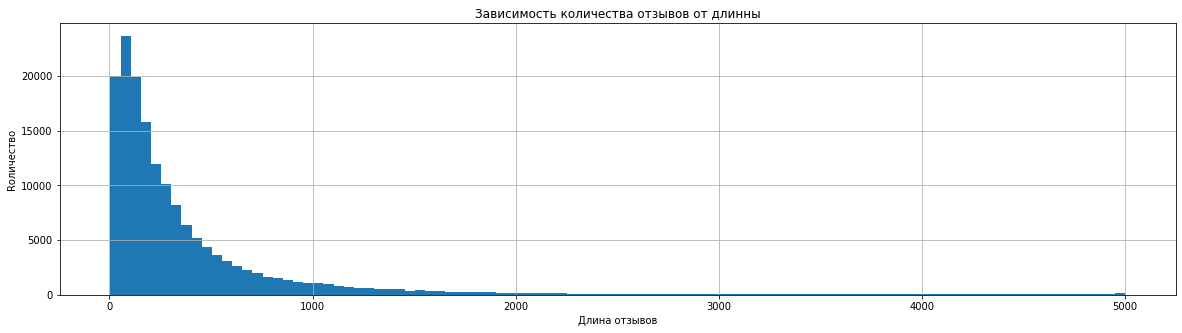

In [6]:
# длинна комментариев
text_len = data['text'].str.len()
# график зависимости количества комментариев от их длинны
plt.figure(figsize = (20, 5))
text_len.hist(bins=100);
plt.title('Зависимость количества отзывов от длинны')
plt.xlabel('Длина отзывов')
plt.ylabel('Rоличество')
plt.show()

In [7]:
data = data.sample(n = 50000, random_state=RANDOM_STATE)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 109486 to 105721
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   toxic   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


**Для решения данного кейса будем использовать векторное представление к задаче анализа текстов, задача решается по следующему порядку:**
- Прежде чем перейти к векторному представлению слов, проводится знакомая вам предобработка текста:
- Выполняют токенизацию каждого текста, то есть его разбивают на слова;
- Слова лемматизируют: приводят к начальной словарной форме (более сложные модели, например, BERT, этого не требуют: они сами понимают формы слов);
- Текст очищают от стоп-слов и ненужных символов;
- Для корректной работы алгоритма добавляют маркеры начала и конца предложения (они приравниваются к токенам).
- На выходе у каждого исходного текста образуется свой список токенов.
-Затем токены передают модели, которая переводит их в векторные представления. Для этого модель обращается к составленному заранее словарю токенов. На выходе для каждого текста образуются векторы заданной длины.
- На финальном этапе модели передают признаки (векторы). И она прогнозирует эмоциональную окраску текста — 0 («отрицательная») или 1 («положительная»).

### Подготовка текста

Проведем лемитизацию слов на нашей выборке и создадим функции очистки и лемитизации.

In [8]:
# Создание корпуса слов
corpus = list(data['text'])

In [9]:
# функция, которая оставит в тексте только кириллические символы и пробелы 
def text_clear(text):
    clear = re.sub(r"[^'a-zA-Z ]", ' ', text) 
    clear = " ".join(clear.split())
    return clear

# функция для лемматизации текста
def text_lemmatize(text):
    w = []
    for i in nltk.word_tokenize(text):
        y = lemmatizer.lemmatize(i, word_pos(i))
        w.append(y)
    return ' '.join(w) 


# функция для создания списка кортежей, где каждый кортеж содержит слово и его часть речи
def word_pos(word):
   
    tag = nltk.pos_tag([word])[0][1][0].lower()
    dic = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return dic.get(tag, wordnet.NOUN)

In [10]:
text_ready = []
for i in range(len(corpus)):
    
    text_ready.append(text_lemmatize(text_clear(corpus[i])))

data['text_lemm'] = pd.Series(text_ready, index = data.index)

In [11]:
# ПРоверка
data.head(10)

,text,toxic,text_lemm
109486,Expert Categorizers \n\nWhy is there no menti...,0,Expert Categorizers Why is there no mention of...
104980,"""\n\n Noise \n\nfart* talk. """,1,Noise fart talk
82166,"An indefinite block is appropriate, even for a...",0,An indefinite block is appropriate even for a ...
18721,I don't understand why we have a screenshot of...,0,I do n't understand why we have a screenshot o...
128178,"Hello! Some of the people, places or things yo...",0,Hello Some of the people place or thing you ha...
108309,"""::::::::::::::If you read carefully, my comme...",1,If you read carefully my comment wa overall a ...
25259,"""\nDid you make it at WP:AE? ofShalott """,0,Did you make it at WP AE ofShalott
32655,know as much as he thinks.,0,know a much a he think
31896,Thank you for your comment and willingness to ...,0,Thank you for your comment and willingness to ...
20224,UPDATE 3-12-06\n\nHEY YALL IM GOING TO BE GONE...,0,UPDATE HEY YALL IM GOING TO BE GONE A WEEK SO ...


**Вывод:** Произведен анализ и подготовка данных, удалены ненужные признаки и произведена полная подготовка текста для задач машинного обучения. Необходимо в следующем этапе решить проблему борьбы классов, а также произвести разделения на выборки для обучения модели.

## Обучение

### Борьба с дисбалансом и разделение на выборки

In [12]:
features = data['text_lemm']
target = data['toxic']

In [13]:
# Разделение на выборки
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = RANDOM_STATE, stratify = target) 

print("Размер features_train:", features_train.shape)
print("Размер features_test:", features_test.shape)
print("Размер target_train:", target_train.shape)
print("Размер target_test:", target_test.shape)

Размер features_train: (40000,)
Размер features_test: (10000,)
Размер target_train: (40000,)
Размер target_test: (10000,)


### Векторизация слов методом TF-IDF

In [14]:
count_tf = TfidfVectorizer(stop_words = STOP_WORDS, analyzer = 'word') 
tf_train = count_tf.fit_transform(features_train)
tf_test = count_tf.transform(features_test)

Произвели корректировку классов, а также разделили данные на выборки. Произведена оценка важности слов методом TF-IDF. Можно приступать к обучению моделей.

### Модель LogisticRegression

In [15]:
model_LR = LogisticRegression(random_state = RANDOM_STATE,
                            solver='sag',
                            class_weight = 'balanced')
                            
parametrs_LR = { 'C': range (1, 20),
              'max_iter': range (10, 100, 10),
              }

grid_LR = GridSearchCV(model_LR, parametrs_LR, cv=3, scoring='f1')

grid_LR.fit(tf_train, target_train)
grid_LR.best_params_

print("F1 наилучшей модели  LogisticRegression:", grid_LR.best_score_)
print(100*'-')
print(' Параметры лучшей модели LogisticRegression', grid_LR.best_params_)

F1 наилучшей модели  LogisticRegression: 0.7446470222237579
----------------------------------------------------------------------------------------------------
 Параметры лучшей модели LogisticRegression {'C': 10, 'max_iter': 50}


### Модель RandomForestClassifier

In [77]:
model_RF = RandomForestClassifier()

# набор параметров 
parametrs_RF = {'n_estimators': [1, 5, 9, 13]}

# подбор оптимальных параметров с помощью GridSearchCV 
grid_RF = GridSearchCV(model_RF, parametrs_RF, scoring='f1', cv=3)

grid_RF.fit(tf_train, target_train)
grid_RF.best_params_

print("F1 наилучшей модели  RandomForestClassifier:", grid_RF.best_score_)
print(100*'-')
print(' Параметры лучшей модели RandomForestClassifier', grid_RF.best_params_)

F1 наилучшей модели  RandomForestClassifier: 0.6492221029610982
----------------------------------------------------------------------------------------------------
 Параметры лучшей модели RandomForestClassifier {'n_estimators': 13}


### Модель DecisionTreeClassifier 

In [78]:
best_model_DT = None
best_result_DT = 0
best_depth_DT = 0

for depth in range(1, 25, 3):
    model_DT = DecisionTreeClassifier(random_state = RANDOM_STATE,
                                      max_depth = depth,
                                      class_weight = 'balanced') 
    scores = cross_val_score(model_DT, tf_train, target_train, cv=5, scoring='f1')
    result_DT = np.mean(scores)
    if result_DT > best_result_DT:
        best_model_DT = model_DT
        best_result_DT = result_DT
        best_depth_DT = depth
        
print("F1 наилучшей модели  DecisionTreeClassifier:", best_result_DT)
print(100*'-')
print(' Глубина depth лучшей модели DecisionTreeClassifier', best_depth_DT)

F1 наилучшей модели  DecisionTreeClassifier: 0.5747593483061865
----------------------------------------------------------------------------------------------------
 Глубина depth лучшей модели DecisionTreeClassifier 22


**Соберем результаты всех моделей в одном месте**

In [88]:
print("F1 наилучшей модели  LogisticRegression:", grid_LR.best_score_)
print(100*'-')
print("F1 наилучшей модели  RandomForestClassifier:", grid_RF.best_score_)
print(100*'-')
print("F1 наилучшей модели  DecisionTreeClassifier:", best_result_DT)

F1 наилучшей модели  LogisticRegression: 0.7446470222237579
----------------------------------------------------------------------------------------------------
F1 наилучшей модели  RandomForestClassifier: 0.6492221029610982
----------------------------------------------------------------------------------------------------
F1 наилучшей модели  DecisionTreeClassifier: 0.5747593483061865


**Вывод:** Самый маленький показатель метрики f1 у модели DecisionTreeClassifier, затем идет модель RandomForestClassifier и возглавляет тройку модель LogisticRegression с показателем метрике f1 - 0.75. Данная метрика соответствует нашему заданию, поэтому данную модель будем использовать для проверки на тестовой выборке.

## Вывод и проверка модели на тестовой выборке

In [87]:
# Проверка лучшей модели LogisticRegression
predictions_LR= grid_LR.predict(tf_test)
print('F1 модели RandomForestClassifier на тестовой выборке', f1_score(target_test, predictions_LR))

F1 модели RandomForestClassifier на тестовой выборке 0.7521448999046711


Как видно на тестовой выборке модель показала результат метрики F1 необходимый нам по заданию, по этому для данного кейса можно использовать модель LogisticRegression

**Общий вывод:** Была произведен анализ и обработка данных, текста были обработаны для задач машинного обучения. Были рассмотрены три модели и сравнивался показатель метрики F1. Лучший показатель показала модель LogisticRegression с параметрами {'C': 10, 'max_iter': 50}. Итоговая метрика F1 на тестовой выборке составила 0.7521, что входит в диапазон нашего задания, поэтому можно сделать вывод, что задачи данного кейса достигнуты.